<a href="https://colab.research.google.com/github/RonnyMuthomi/neural-networks/blob/main/sequential_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# load IMDB dataset from keras datasets

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data,
                             test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_data[0]
train_labels[0]

np.int64(1)

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# decoding reviews back to text

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
ded_review ="".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
from collections.abc import Sequence
# preparing the data

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, Sequence in enumerate(sequences):
    for j in Sequence:
                     results[i, j] = 1

                     return results

x_train =vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)










In [11]:
x_train[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [12]:
# vertorize labels

y_train = np.asarray(train_labels).astype("float32")
y_test =np.asarray(test_labels).astype("float32")

In [16]:
# Modeling

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

In [17]:
# compling model

model.compile(optimizer ="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
# Set aside a validation test
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# Train model
hist = model.fit(partial_x_train, partial_y_train, epochs=20,
                 batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5066 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5053 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.4947 - v

In [25]:
hist_dict = hist.history
hist_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

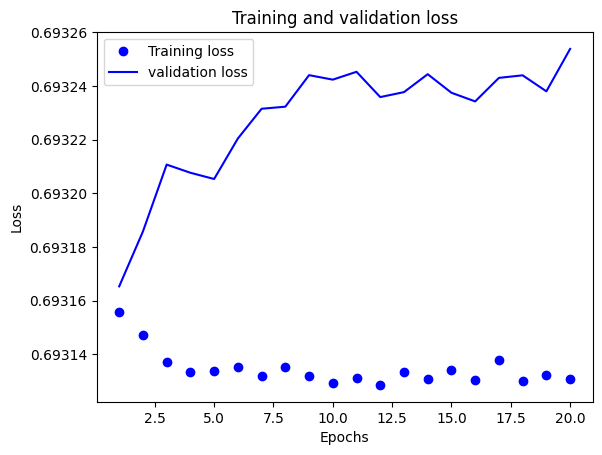

In [28]:
hist_dict = hist.history
loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
epochs = range(1, len(loss_values) +1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label='validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()